## Imports

In [31]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Preprocessing data

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_home_team_statistics_df = pd.read_csv('./train_home_team_statistics_df.csv', index_col=0)
train_away_team_statistics_df = pd.read_csv('./train_away_team_statistics_df.csv', index_col=0)

train_scores = pd.read_csv('./Y_train.csv', index_col=0)

train_home = train_home_team_statistics_df.iloc[:, 2:]
train_away = train_away_team_statistics_df.iloc[:, 2:]

train_data = train_home - train_away

train_data = train_data.replace({np.inf : 0, -np.inf: 0, np.nan:0})

scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)

In [33]:
train_data

array([[-2.38809784e-01,  2.86609783e-01,  2.77632740e-01, ...,
        -2.39514938e-01,  6.18482160e-01,  1.57040688e-02],
       [ 5.40452025e-01,  1.36010401e+00, -2.36549948e-01, ...,
         5.27935089e-01,  9.26658661e-01,  2.69924013e-01],
       [ 2.09441522e-02, -2.50137330e-01,  2.77632740e-01, ...,
         7.83751764e-01, -2.15510636e+00, -4.92735820e-01],
       ...,
       [-7.58317657e-01, -1.05525800e+00, -2.36549948e-01, ...,
        -4.95331614e-01, -3.06047346e-01, -4.92735820e-01],
       [ 2.80698089e-01,  1.82362264e-02, -1.26491532e+00, ...,
         2.72118413e-01,  2.12915571e-03, -2.38515876e-01],
       [-7.58317657e-01, -1.05525800e+00,  2.77632740e-01, ...,
        -1.00696497e+00,  1.85118817e+00, -2.38515876e-01]])

## Train

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping


num_classes = 3

X_train, X_test, y_train, y_test = train_test_split(train_data, train_scores, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stopping])

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc}')


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4267 - loss: 1.1495 - val_accuracy: 0.4688 - val_loss: 1.0412
Epoch 2/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4684 - loss: 1.0515 - val_accuracy: 0.4830 - val_loss: 1.0334
Epoch 3/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4899 - loss: 1.0261 - val_accuracy: 0.4733 - val_loss: 1.0380
Epoch 4/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4827 - loss: 1.0257 - val_accuracy: 0.4860 - val_loss: 1.0329
Epoch 5/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4883 - loss: 1.0298 - val_accuracy: 0.4901 - val_loss: 1.0307
Epoch 6/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5051 - loss: 1.0025 - val_accuracy: 0.4901 - val_loss: 1.0327
Epoch 7/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4972 - loss: 1.0096 - val_accuracy: 0.4850 - val_loss: 1.0349
Epoch 8/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5080 - loss: 1.0056 - val_accuracy: 0.4896 - val_

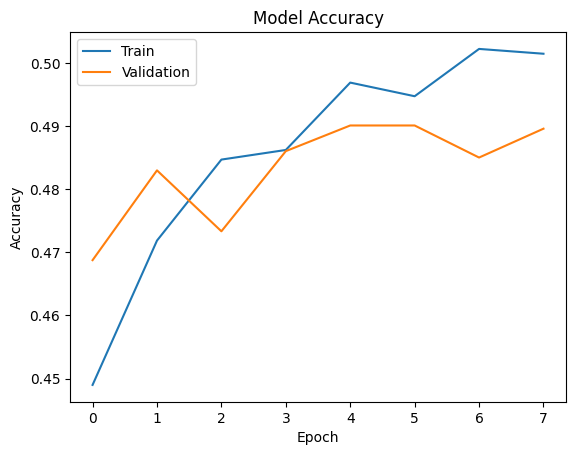

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Predict

In [36]:
test_home = pd.read_csv('./test_home_team_statistics_df.csv', index_col=0)
test_away = pd.read_csv('./test_away_team_statistics_df.csv', index_col=0)

test_data = test_home - test_away

test_data = test_data.replace({np.inf : 0, -np.inf: 0, np.nan:0})

scaler = StandardScaler()
test_data = scaler.fit_transform(test_data)

In [37]:
test_data

array([[-0.74057404,  0.02323617,  0.0251823 , ...,  1.02441327,
        -1.38468946,  0.76225223],
       [-0.22970694, -0.49089822,  0.0251823 , ...,  0.01805011,
        -1.93702807, -1.72163511],
       [ 1.55832791,  2.33684088,  1.54438489, ...,  1.52759485,
        -0.00384294, -2.21841258],
       ...,
       [ 1.81376146,  1.56563931,  2.05078575, ..., -0.23354068,
        -0.00384294,  0.5138635 ],
       [-0.22970694, -0.49089822,  0.0251823 , ...,  0.52123169,
         1.37700358,  0.26547476],
       [ 1.30289436,  1.56563931,  2.05078575, ..., -1.49149463,
        -0.00384294,  0.01708603]])

In [38]:
y_predict = model.predict(test_data)

793/793 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [39]:
y_predict

array([[0.36249024, 0.31787473, 0.319635  ],
       [0.39595953, 0.22321492, 0.3808254 ],
       [0.66945624, 0.17355382, 0.15698987],
       ...,
       [0.60668993, 0.19769348, 0.19561657],
       [0.42906645, 0.3049858 , 0.26594773],
       [0.41341877, 0.29742488, 0.28915626]], dtype=float32)

In [40]:
y = np.zeros(y_predict.shape, dtype=int)
max_indices = np.argmax(y_predict, axis=1)

y[np.arange(y_predict.shape[0]), max_indices] = 1

prefix = np.arange(12303, 12303 + len(y)).reshape(-1, 1)
y = np.hstack((prefix, y))

In [41]:
y

array([[12303,     1,     0,     0],
       [12304,     1,     0,     0],
       [12305,     1,     0,     0],
       ...,
       [37668,     1,     0,     0],
       [37669,     1,     0,     0],
       [37670,     1,     0,     0]])

In [42]:
import csv

filename = './output.csv'

with open(filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['ID', 'HOME_WINS', 'DRAW', 'AWAY_WINS'])
    writer.writerows(y)